In [1]:
from functools import reduce
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from NN import build_fcnn
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
targets = np.array(
    [[int(idx == digit) for idx in range(10)] for digit in digits.target]
)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, targets, test_size=0.3, shuffle=False
)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(z):
    sigmoid_given_z = sigmoid(z)
    return sigmoid_given_z * (1 - sigmoid_given_z)

def evaluate_accuracy(model):
    model_outputs = model(X_test).T

    return reduce(
        lambda correct_count, outputs: correct_count + (np.argmax(outputs[0]) == np.argmax(outputs[1])),
        zip(model_outputs, y_test),
        0,
    ) / len(X_test)

model = build_fcnn(
    layers_sizes=[
        X_train.shape[1],
        100,
        50,
        10,
    ],
    activation=sigmoid,
    activation_derivative=sigmoid_derivative,
    data=list(zip(X_train, y_train)),
    batch_size=8,
    on_epoch_end=lambda epoch_number, learning_time, model: print(
        f"Epoch {epoch_number} finished in {learning_time} with accuracy: {evaluate_accuracy(model)}"
    ),
)

Epoch 0 finished in 0.03646646400000009 with accuracy: 0.5888888888888889
Epoch 1 finished in 0.054574187000071106 with accuracy: 0.6962962962962963
Epoch 2 finished in 0.04667215300003136 with accuracy: 0.6944444444444444
Epoch 3 finished in 0.046576263000019935 with accuracy: 0.7907407407407407


/tmp/ipykernel_9437/1718884097.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 4 finished in 0.04769613400003436 with accuracy: 0.7592592592592593
Epoch 5 finished in 0.05168855199997324 with accuracy: 0.8074074074074075
Epoch 6 finished in 0.05501865099995484 with accuracy: 0.8092592592592592
Epoch 7 finished in 0.04757363099997747 with accuracy: 0.8074074074074075
Epoch 8 finished in 0.05362114299998666 with accuracy: 0.8018518518518518
Epoch 9 finished in 0.05423963299995194 with accuracy: 0.8166666666666667
Epoch 10 finished in 0.046775959999990846 with accuracy: 0.8222222222222222
Epoch 11 finished in 0.044044981999945776 with accuracy: 0.8092592592592592
Epoch 12 finished in 0.050329886999975315 with accuracy: 0.8111111111111111
Epoch 13 finished in 0.05614763200003381 with accuracy: 0.8481481481481481
Epoch 14 finished in 0.05628251900009218 with accuracy: 0.8425925925925926
Epoch 15 finished in 0.05436307399997986 with accuracy: 0.8518518518518519
Epoch 16 finished in 0.06277136899996094 with accuracy: 0.8222222222222222
Epoch 17 finished in 0.06430

/tmp/ipykernel_9437/1718884097.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Prediction: 8, actual: 8


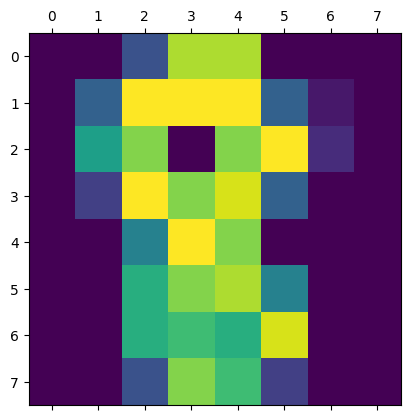

In [4]:
image_idx = 742
plt.matshow(digits.images[image_idx])
predicton = np.argmax(model(digits.images[image_idx].reshape(1, -1)).T)
print(f"Prediction: {predicton}, actual: {digits.target[image_idx]}")